#### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [4]:
loan = pd.read_csv('loan_data.csv')

In [5]:
loan.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [6]:
loan['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

#### Exploratory Data Analysis

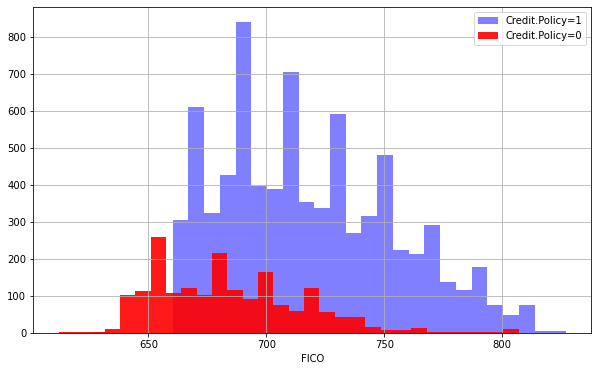

In [7]:
plt.figure(figsize=(10,6))
loan[loan['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
loan[loan['credit.policy']==0]['fico'].hist(alpha=0.9,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')
plt.show()

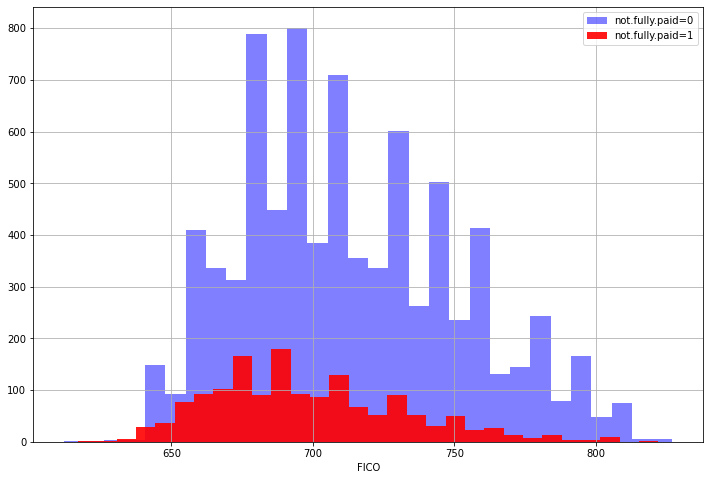

In [8]:
plt.figure(figsize =(12,8))
loan[loan['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='blue',bins=30,label= 'not.fully.paid=0')
loan[loan['not.fully.paid']==1]['fico'].hist(alpha=0.9,color='red',bins=30,label= 'not.fully.paid=1')
plt.legend()
plt.xlabel('FICO')
plt.show()

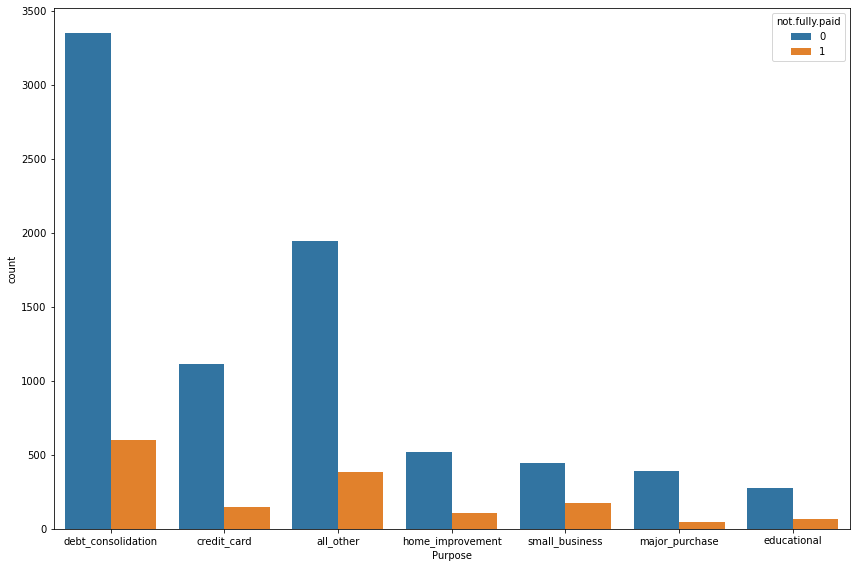

In [40]:
plt.figure(figsize = (12,8))
sns.countplot(x= "purpose",hue= 'not.fully.paid', data =  loan)
plt.xlabel('Purpose')
plt.tight_layout()
plt.show()

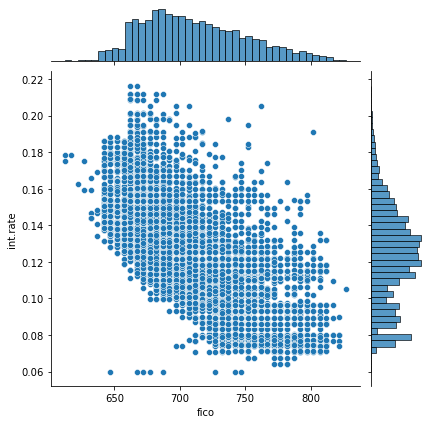

<Figure size 432x288 with 0 Axes>

In [9]:
sns.jointplot(x ='fico', y = 'int.rate',data = loan)
plt.xlabel('FICO')
plt.xlabel('Interest Rate')
plt.show()
plt.tight_layout()

<Figure size 792x504 with 0 Axes>

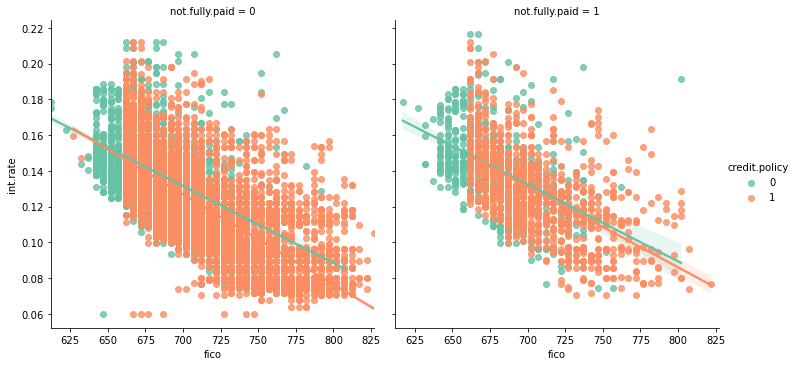

In [10]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loan,hue='credit.policy',col='not.fully.paid',palette='Set2')
plt.show()

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [12]:
cat_feature =['purpose']

In [13]:
fin_loan =pd.get_dummies(data =loan ,columns = cat_feature,drop_first=True) # converting objects into intergers

In [14]:
fin_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

#### Train Test Split

In [15]:
X = fin_loan.drop('not.fully.paid', axis = 1)
y= fin_loan['not.fully.paid']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Training a Decision Tree Model

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
prediction=dtree.predict(X_test)

In [20]:
print(classification_report(y_test,prediction))
print("\n")
print(confusion_matrix(y_test,prediction))


              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.19      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



[[1986  445]
 [ 336  107]]


In [21]:
print('The accuracy  score for the model is:', accuracy_score(y_test,prediction))

The accuracy  score for the model is: 0.7282533054975644


#### Training the Random Forest model

In [22]:
rc =RandomForestClassifier(n_estimators=600)

In [23]:
rc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [24]:
prediction_2 = rc.predict (X_test)

In [25]:
print(confusion_matrix(y_test ,prediction_2))
print('\n')
print(classification_report(y_test ,prediction_2))

[[2423    8]
 [ 438    5]]


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.38      0.01      0.02       443

    accuracy                           0.84      2874
   macro avg       0.62      0.50      0.47      2874
weighted avg       0.78      0.84      0.78      2874



In [26]:
print('The accuracy  score for the model is:', accuracy_score(y_test,prediction_2))

The accuracy  score for the model is: 0.8448155880306193


In [27]:
#The Random Forest Model is better at dertermining whether individual will fully pay or not 